<a href="https://colab.research.google.com/github/JayasreeKandregula/Deep-Learning/blob/feature1/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
!pip install nnfs
from nnfs.datasets import spiral_data

1. An inputs neurons sending info to one nueron of another layer.
2. A single nueron contains Weights of array of length of input.
3. A neuron also contain its own bias.

In [2]:
inputs = [1,2,3]
weights = [0.2, 0.8, 0.5] 
bias =2

In [3]:
output = inputs[0]*weights[0] + inputs[1]*weights[1] +inputs[2]*weights[2] +bias

In [4]:
output

5.3

1. Consider 4 neurons sending input to 3 neurons of another layer.
2. Inputs contains 4 input values.
3. Weights contains 3 sets of arrays of weights associated to 3 neurons of length 4 
4. 3 neurons contains 3 unique biases.

In [5]:
inputs = [1,2,3, 2.5]
weights1 = [0.2, 0.8, -0.5, 1.0] 
weights2 = [0.5, -0.91, 0.26, -0.5] 
weights3 = [-0.26, -0.27, 0.17, 0.87] 
bias1 = 2
bias2 = 3
bias3 = 0.5

In [6]:
output = [(inputs[0]*weights1[0] + inputs[1]*weights1[1] +inputs[2]*weights1[2] + inputs[3]*weights1[3])+bias1,
         inputs[0]*weights2[0] + inputs[1]*weights2[1] +inputs[2]*weights2[2] +inputs[3]*weights2[3]+bias2,
         inputs[0]*weights3[0] + inputs[1]*weights3[1] +inputs[2]*weights3[2] +inputs[3]*weights3[3]+bias3]

In [7]:
output

[4.8, 1.21, 2.385]

The same code in for loops.

In [8]:
inputs = [1,2,3, 2.5]
weights = [[0.2, 0.8, -0.5, 1.0] ,[0.5, -0.91, 0.26, -0.5],[-0.26, -0.27, 0.17, 0.87]]
biases = [2,3,0.5]

In [9]:
layer_outputs = []
for neuron_bias, neuron_weights in zip(biases, weights):
    output=0
    for neuron_weight, neuron_input in zip(neuron_weights, inputs):
        output += neuron_weight*neuron_input
    output+=neuron_bias
    layer_outputs.append(output)
print(layer_outputs)

[4.8, 1.21, 2.385]


Code in dot product

In [10]:
#weights 3*4 inputs 4*1 output 3*1
np.dot(weights,inputs) + biases
# If weights and inputs are interchanges, you get an error that order is not same
#   weights have m*n inputs have n*y result output is m*y

array([4.8  , 1.21 , 2.385])

Batch Size: Instead of sending one neuron at a time, we send inputs of particular size, which is batch size

In [11]:
#considering batch size of 3 inputs and pass it to 3 neurons which results in giving 
# 3 outputs.
inputs = [[1,2,3, 2.5], [2.0,5.0,-1.0,2.0], [-1.5,2.7,3.3,-0.8]]

In [12]:
#inputs 3*4 weights 3*4 
np.dot(np.array(inputs).T, weights)
#this is wrong way since we have input 3 inputs and output needed is 3 rows(3 neurons) but got 4 rows
layer1=np.dot(inputs, np.array(weights).T)+biases
layer1

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

Add another layer with new weights and biases for neurons.
So layer 1 ouputs will be inputs for layer 2. 
weights associated with neurons should be size = length of inputs which is 3

In [13]:
weights2 = [[0.1, -0.14, 0.5],
           [-0.5, 0.12, -0.33],
           [-0.44, 0.73, -0.13],
           [0,0,0]]
biases2 = [-1,2,-0.5,0]

In [14]:
layer2 = np.dot(layer1, np.array(weights2).T)+biases2

In [15]:
layer2
# The 4th neuron for 1st input gives 0 similarly for all inputs gives 0

array([[ 0.5031 , -1.04185, -2.03875,  0.     ],
       [ 0.2434 , -2.7332 , -5.7633 ,  0.     ],
       [-0.99314,  1.41254, -0.35655,  0.     ]])

In [16]:
np.random.seed(0)
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = np.random.randn(n_inputs,n_neurons) # inorder to skip transpose
        self.biases = np.zeros((1,n_neurons))
    def forward_pass(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [17]:
layer1  = Layer_Dense(4,3) # 4 inputs 3 neurons
layer2  = Layer_Dense(3,5) # 3 inputs 5 neurons
layer1.forward_pass(inputs)
first_layer_output=layer1.output # gives 3/3 matrix for every input 3 neurons o/ps
layer2.forward_pass(first_layer_output)
layer2.output
# in second layer, first layer 3 neurons will be input,
# for 3 inputs, 5 neurons o/ps are printed.

array([[  8.90617854,   0.75262811,   6.37578273, -10.35783663,
         17.87298299],
       [  9.01549997,   5.0269016 ,  -2.3641483 , -22.25199903,
         28.73652534],
       [ -0.90849509,   6.11813272, -13.24725074,   0.46119336,
         11.52489874]])

In [18]:
inputs

[[1, 2, 3, 2.5], [2.0, 5.0, -1.0, 2.0], [-1.5, 2.7, 3.3, -0.8]]

In [19]:
first_layer_output

array([[10.12260025,  4.04131049,  2.35020944],
       [14.60367927, 10.57754872,  0.08285243],
       [ 6.2111461 ,  3.82745712, -5.61079827]])

**Activation function:**
Multiplying with weights and adding bias just gives a linear equation.
To solve the non-linear models after the forward pass, every neuron must be passed to activation function.
We can have sigmoid function--

**Rectified linear Function:** 
y=x if x>0, else 0.
ReLU activations fits for non-linear models as well.
The more number of neurons in hidden layers the best fit the line may be.




In [20]:
class ReLUActivation:
  def forward(self, inputs):
    self.output = np.maximum(0,inputs)

In [21]:
X,y = spiral_data(100,3) #100 inputs 3 class labels

In [22]:
hidden_layer1 = Layer_Dense(2,3) # Each input has 2 features. and 3 neurons.
hidden_layer2 = Layer_Dense(3,3) # Each input has 2 features. and 3 neurons.
hidden_layer1.forward_pass(X) #this output given to activation function.
activation1 = ReLUActivation()
activation1.forward(hidden_layer1.output)
hidden_layer2.forward_pass(activation1.output)

Softmax Function:
It is a normalized exponential function.

It is the activation function that is applied to output layer to determine the probabilities of neurons and say which neuron performed the best.

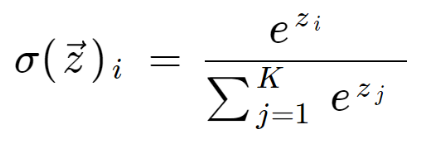

Formula: Exponentiation is used for removing the negative numbers from the layer outputs.
The exponentiated number is divided with sum of all exponentiated values of neurons.This results in probability distribution of output neurons. 
Prior to exponentiation, the output values before giving to activation function, we subtract every output values with the max value. This is to prevent overflow of exponent values. 
Eg: exp(1000) gives us overflow error.
By subtracting with highest value, the highest output value will be 0 and remaining outputs < 0.

In [23]:
class SoftmaxActivation:
  def forward_pass(self, inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis=1,keepdims=True))
    self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

In [26]:
activation2 = SoftmaxActivation()
activation2.forward_pass(hidden_layer2.output)
print(activation2.output[:5]) # sum of probabilities will be 1.

[[0.33333333 0.33333333 0.33333333]
 [0.33618036 0.32295648 0.34086316]
 [0.33880383 0.3121551  0.34904107]
 [0.34118943 0.31256781 0.34624277]
 [0.34407901 0.29912113 0.35679986]]


## Loss Function:
It is referred to as cost function, which quantifies how wrong the model is?
The lower the loss, higher the model performance.
1. We donot calculate the error based on the model accuracy.

Consider an  example of output of softmax function- [0.22, 0.6, 0.18] vs [0.32, 0.36, 0.32]. The accuracy of both outputs are same but confidence of 1st output is 0.6 and confidence of 2nd output is 0.36 which is less than 1st output. The loss function captures the confidence of the output.

## Categorical Cross-Entropy Loss:
Cross entropy is generally used for categorical models. The most common practice is to use the cross entropy losss function after the softmax activation function on output layer. The softmax function converts the logits to probabilities.

y=target values y-hat= predicted values.

The simplified loss function L = -log(correct_class_prediction)

In [30]:
#consider softmax activation function produces the below output
softmax_outputs = np.array([[0.7,0.1,0.2],
                           [0.1,0.5,0.4],
                           [0.02,0.9,0.08]])
#class targets
class_targets = [0,1,1] # Consider 3 labels Dog-0, Cat-1, human-1
#class_targets in One-hot-encoding
class_targets_ohe = np.array([[1,0,0],
                             [0,1,0],
                             [0,1,0]])

### Calculation of cross-entropy
 L = mean [-(log(0.7)*1+ log(0.1)*0+log(0.2)*0), -(log(0.1)*0+ log(0.5)*1+log(0.4)*0), -(log(0.02)*0+ log(0.9)*1+log(0.08)*0)]
 
 The above formula breaksdown to :
 L = mean(-log(0.7), -log(0.5), -log(0.9))
  
 The first input target = 0, so log(0.7) is calculated, The second input target = 1, so log(0.5) is calculated, The third input target = 1, so log(0.9) is calculated. The average of above three inputs is the loss value.

In [28]:
class Loss:
    def calculate(self, output, y):
        samples_loss = self.forward(output, y)
        avg_loss = np.mean(samples_loss)
        return avg_loss
    

In [71]:
class CategoricalCrossEntropy(Loss):
    def forward(self, output, y):
        #np.clip() sets a range min value=1e-7 and max-value =1-1e-7 for output
        y_pred_clipped = np.clip(output, 1e-7, 1-1e-7) 
        if(len(y.shape)==1):
            confidence = -np.log(y_pred_clipped[range(len(y_pred_clipped)), y])
        elif(len(y.shape)==2):
            confidence = -np.log(np.sum(y_pred_clipped*y, axis=1))
        return confidence

In [72]:
loss = CategoricalCrossEntropy()
#loss.calculate(softmax_outputs, class_targets)
loss.calculate(softmax_outputs, class_targets_ohe)

0.38506088005216804

In [73]:
loss = loss.calculate(activation2.output, y)
print(loss)

1.4109906991979755
